In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from env import CarEnv
from stable_baselines3 import A2C, DQN, PPO
from stable_baselines3.common.monitor import Monitor

In [16]:
num_steps = int(2e4)

In [19]:
env = Monitor(CarEnv(limit=10000))
model = A2C.load("models/a2c_2")


obs, info = env.reset()
for step in range(num_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, trunc, info = env.step(action)
    if done or trunc:
        obs, info = env.reset()

sum_episode_rewards = sum(env.get_episode_rewards())
sum_episode_lengths = sum(env.get_episode_lengths())

a2c_sample_efficiecy = sum_episode_rewards / sum_episode_lengths
print(f"A2C sample efficiency: {a2c_sample_efficiecy}")


Environment loading..

Observation space:
Box(-inf, inf, (8,), float16)

Action space:
Discrete(5)

Action space sample:
1
A2C sample efficiency: 0.10669665198468437


In [12]:
env = Monitor(CarEnv(limit=10000))
model = DQN.load("models/dqn_2")

obs, info = env.reset()
for step in range(num_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, trunc, info = env.step(action)
    if done or trunc:
        obs, info = env.reset()

sum_episode_rewards = sum(env.get_episode_rewards())
sum_episode_lengths = sum(env.get_episode_lengths())

dqn_sample_efficiecy = sum_episode_rewards / sum_episode_lengths
print(f"DQN sample efficiency: {dqn_sample_efficiecy}")

Environment loading..

Observation space:
Box(-inf, inf, (8,), float16)

Action space:
Discrete(5)

Action space sample:
4
DQN sample efficiency: -0.17194683078329837


In [13]:
env = Monitor(CarEnv(limit=10000))
model = PPO.load("models/ppo_2")

obs, info = env.reset()
for step in range(num_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, trunc, info = env.step(action)
    if done or trunc:
        obs, info = env.reset()

sum_episode_rewards = sum(env.get_episode_rewards())
sum_episode_lengths = sum(env.get_episode_lengths())

ppo_sample_efficiecy = sum_episode_rewards / sum_episode_lengths
print(f"PPO sample efficiency: {ppo_sample_efficiecy}")

Environment loading..

Observation space:
Box(-inf, inf, (8,), float16)

Action space:
Discrete(5)

Action space sample:
2
PPO sample efficiency: 0.38457991254890217


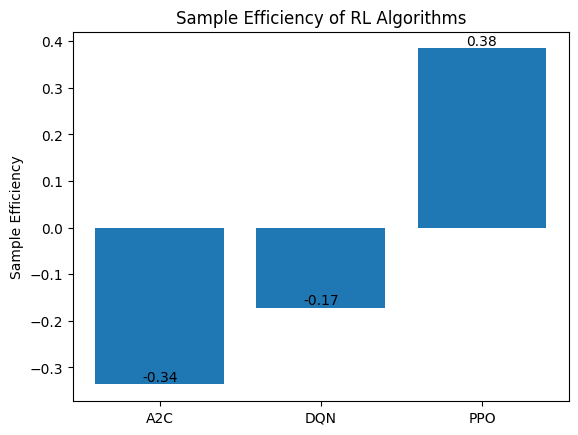

In [18]:
# plot bar graph
fig, ax = plt.subplots()
bar_labels = ["A2C", "DQN", "PPO"]
bar_values = [a2c_sample_efficiecy, dqn_sample_efficiecy, ppo_sample_efficiecy]
bars = ax.bar(bar_labels, bar_values)
ax.set_ylabel("Sample Efficiency")
ax.set_title("Sample Efficiency of RL Algorithms")

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()